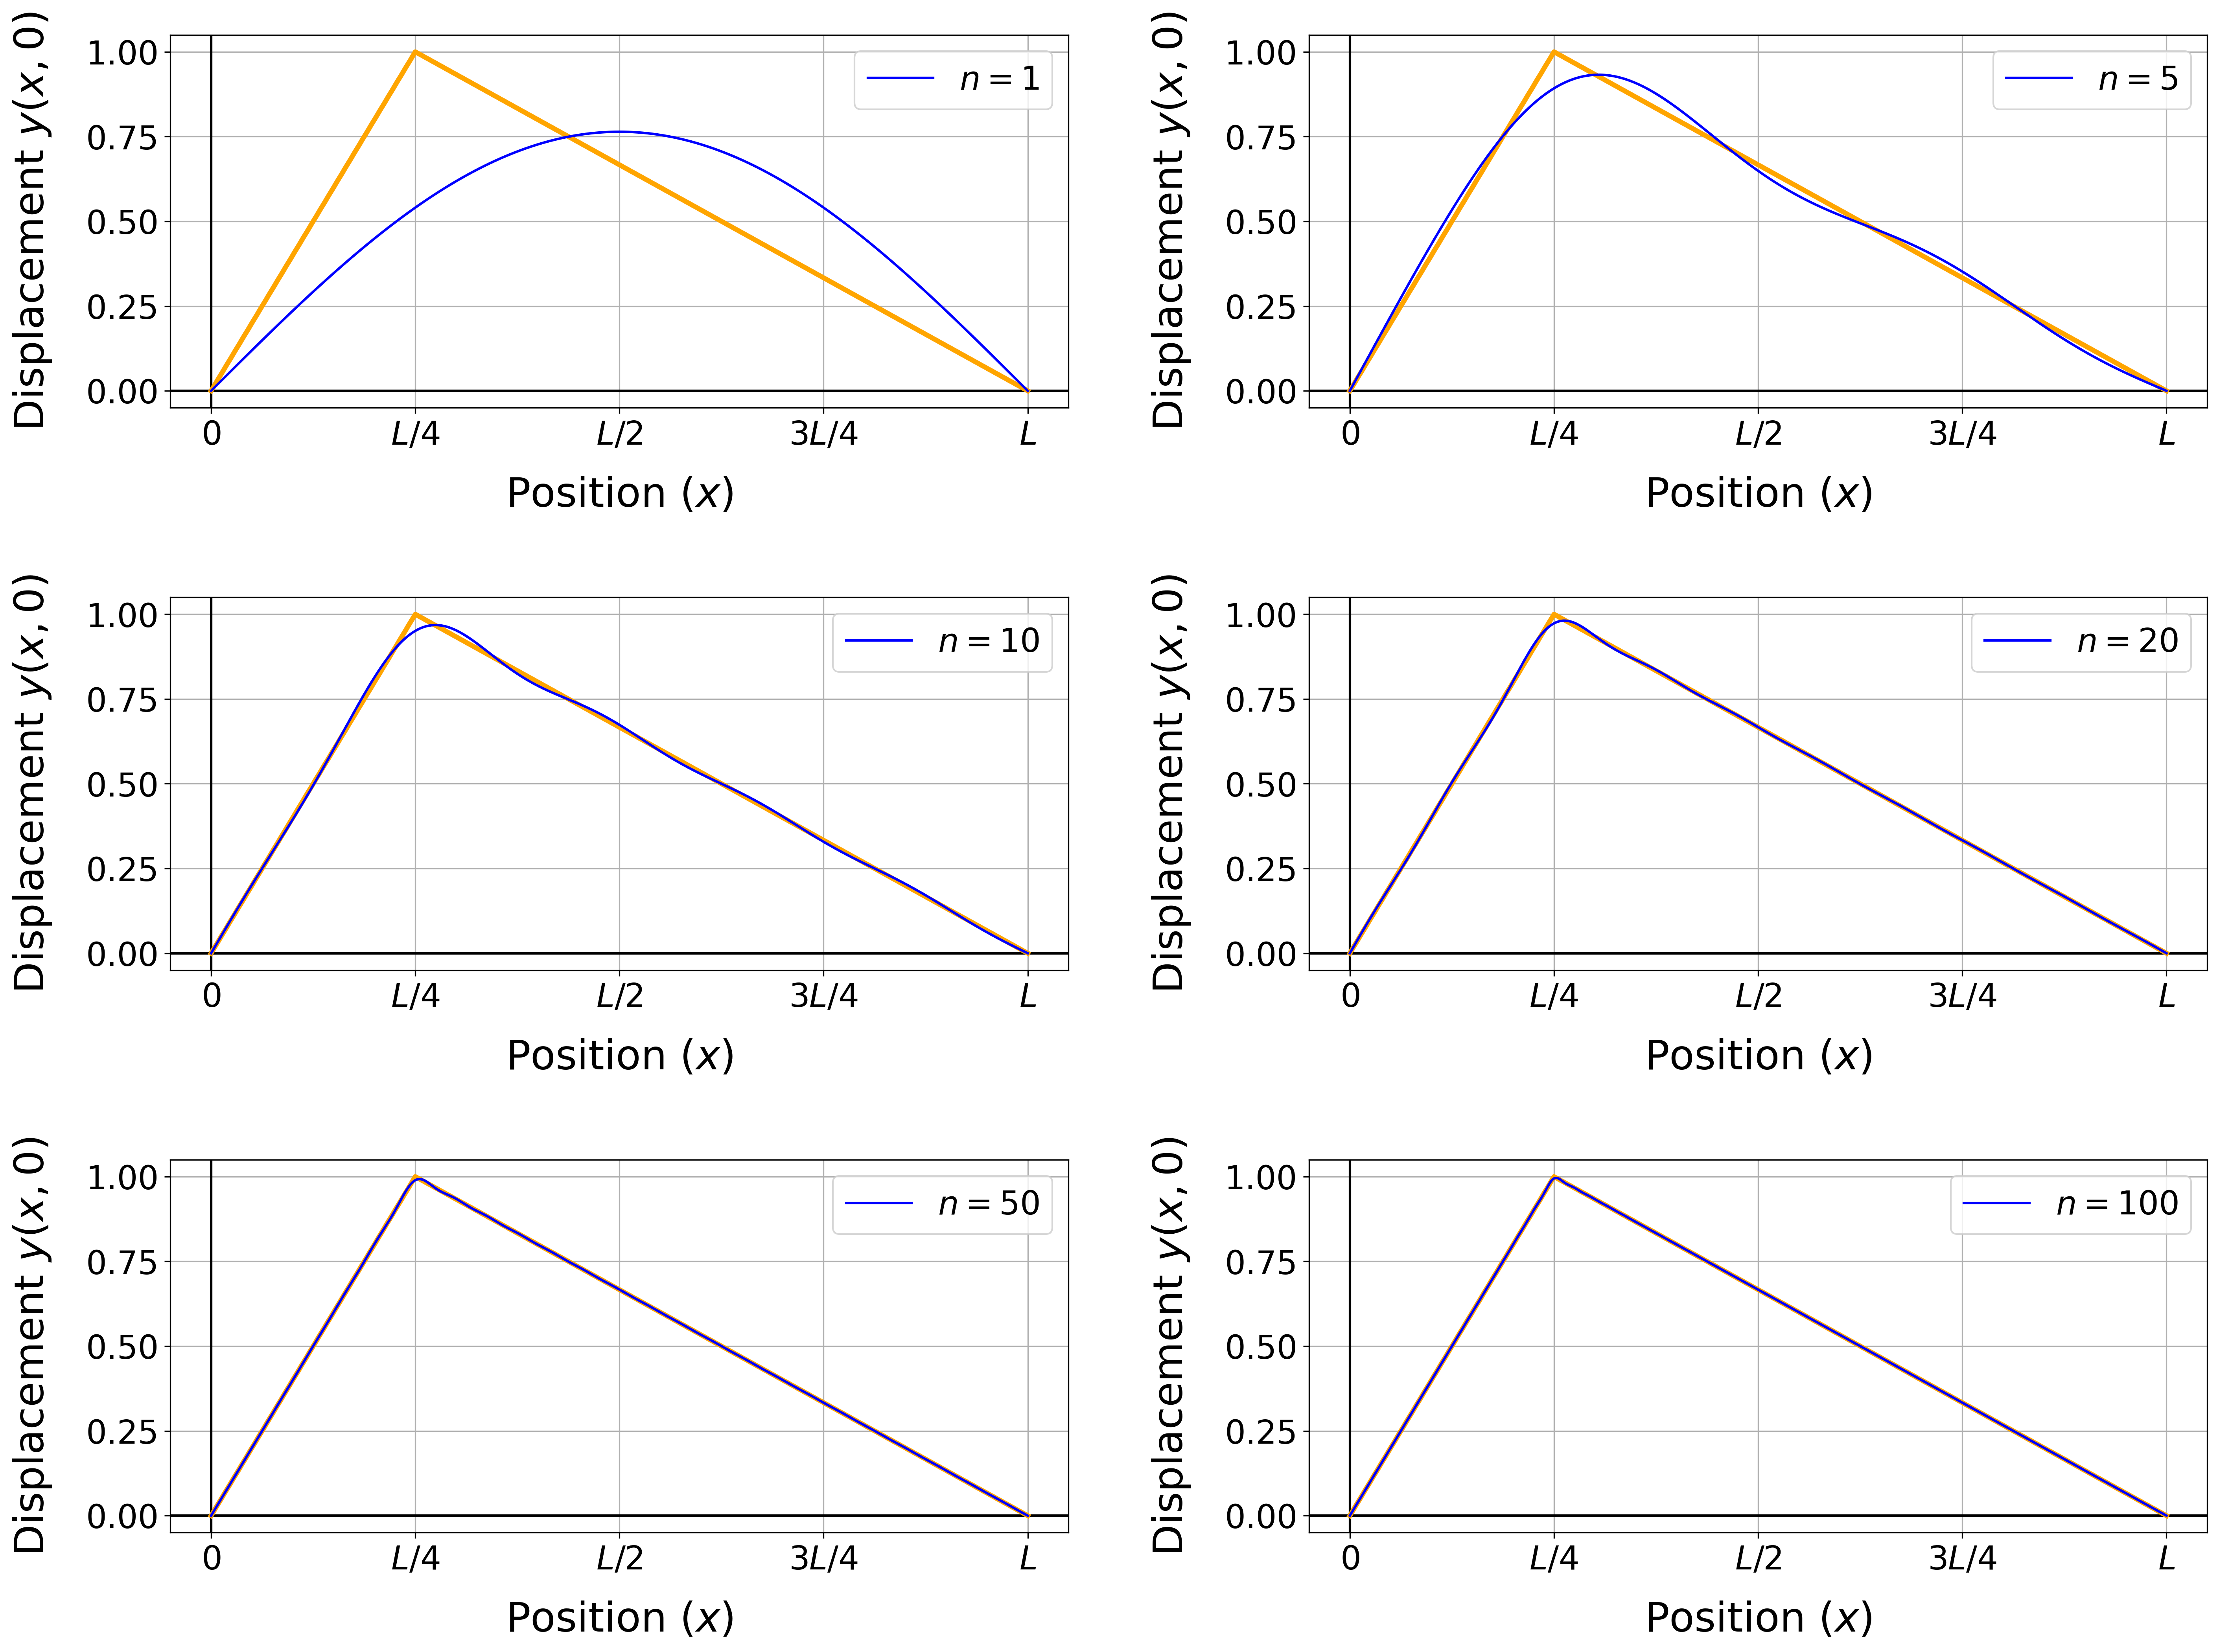

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 4
h = 1
x = np.linspace(0, L, 10000)

# Define the initial waveform function
def initial_wave(x: float) -> float:
    if 0 <= x <= L/4:
        return 4*h/L * x
    elif L/4 <= x <= L:
        return (4*h)/(3*L)*(L - x)

# Calculate initial waveform values
initial_wave_y = [initial_wave(i) for i in x]

# Define the Fourier series function
def fourier_series(x: float, n: int) -> float:
    series = 0
    for i in range(1, n + 1):
        series += (32 * h) / (3 * i**2 * np.pi**2) * np.sin(i * np.pi / 4) * np.sin(i * np.pi * x / L)
    return series

# Custom function to format x-axis ticks
def my_ticks(value, tick_number):
    N = int(np.round(4 * value / L))
    if N==0:
        return r'$0$'
    elif N == 1:
        return r'$L/4$'
    elif N == 2:
        return r'$L/2$'
    elif N == 3:
        return r'$3L/4$'
    elif N == 4:
        return r'$L$'

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(20, 15), dpi = 300)

# Values of n for the Fourier series
n_values = [1, 5, 10, 20, 50, 100]

# Iterate through subplots
for n, ax in zip(n_values, axs.flatten()):
    # Add horizontal and vertical lines at y=0 and x=0
    ax.axhline(0, c='k')
    ax.axvline(0, c='k')
    
    # Plot the initial waveform in orange
    ax.plot(x, initial_wave_y, lw=3, c='orange')
    
    # Plot the Fourier series for the given n in blue and add a label
    ax.plot(x, fourier_series(x, n), c='b', label=r"$n = {0}$".format(n))
    
    # Set x-axis major tick locations and labels using custom ticks
    ax.xaxis.set_major_locator(plt.MultipleLocator(L/4))
    ax.xaxis.set_major_formatter(my_ticks)
    
    # Set axis labels and add grid lines
    ax.set_xlabel(r"Position ($x$)", fontsize=25, labelpad=15)
    ax.set_ylabel(r"Displacement $y(x, 0)$", fontsize=25, labelpad=20)
    ax.grid()
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
    # Add a legend to distinguish Fourier series plots
    ax.legend(fontsize=20)

fig.tight_layout(pad=5)
plt.savefig("a-02_p-03-02.png")

# Display the plot
plt.show()
